<b>BDS^3</b> Ukrainian Biological Data Science School

2024-06, Uzhzhorod 

<p>
<div class="alert-info" style="padding: 20px; border-radius: 10px">
<b> 🦠 Курс "Аналіз мікробіому. Пошук ассоціацій з хворобами"</b> 

<i> by Kateryna Pantiukh </i> 
https://github.com/Chartiza 
</div>

**Практичний блок 1. Metadata**

Аналіз метаданих людей, зразки яких доступні до аналізу. Структура популяції. histogram, piechart, swarmplot, violinplot. 


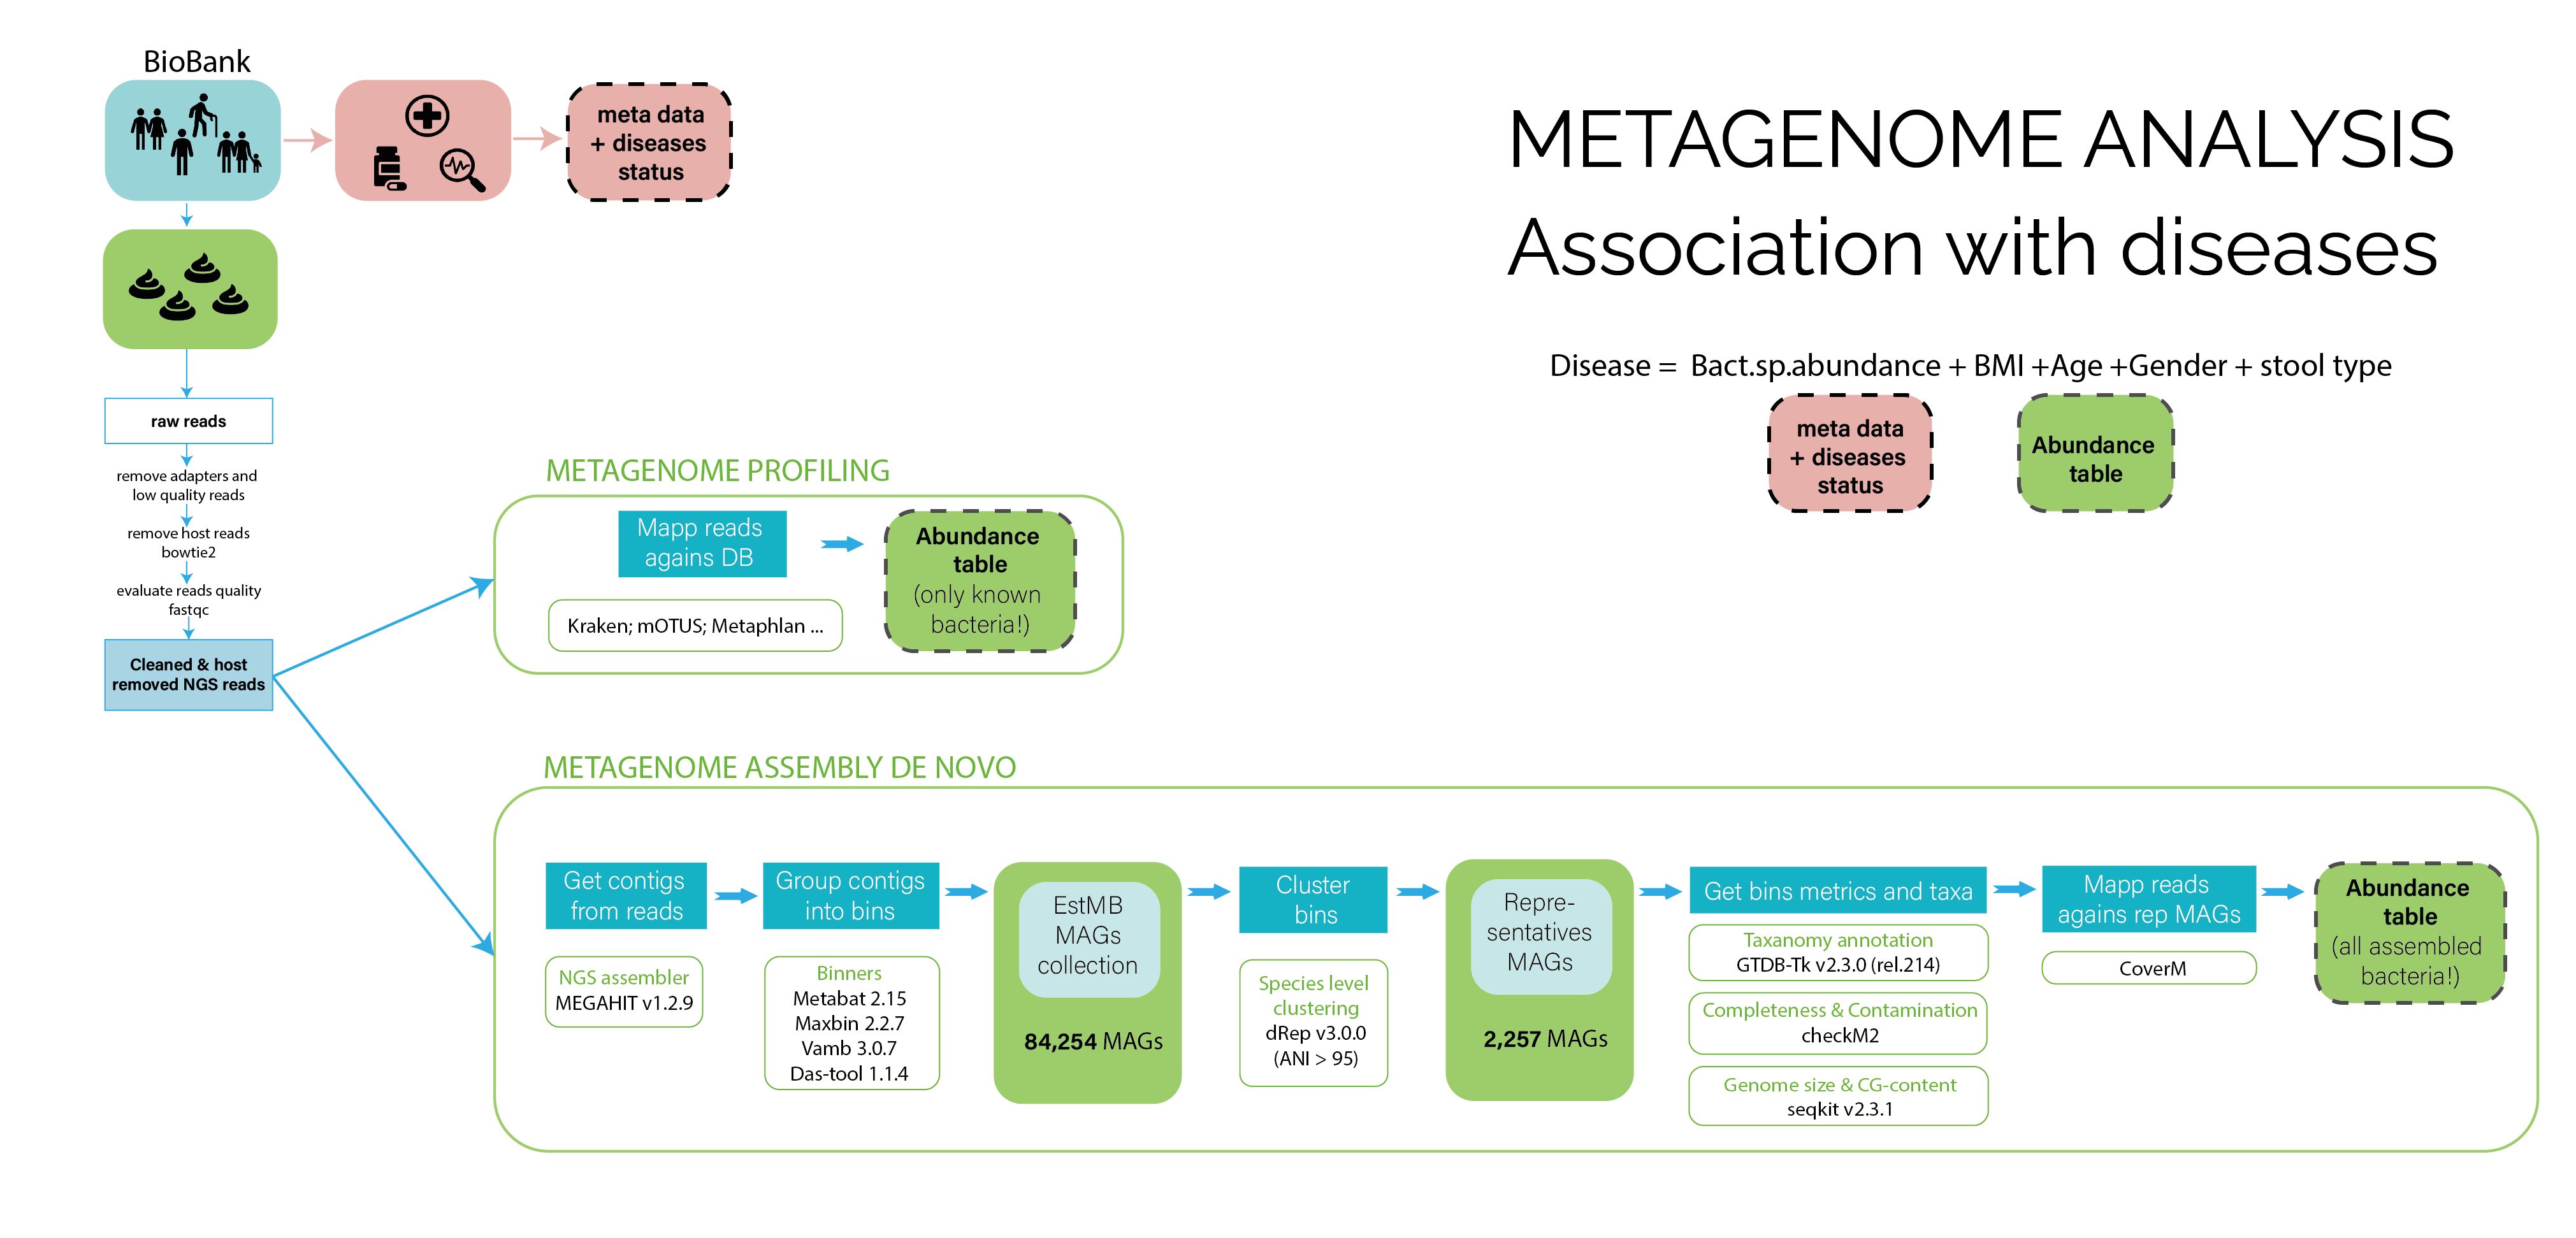

<p><div class="alert-success" style="padding: 20px; border-radius: 10px">
<b> PACKAGES </b> </div>


- Перед початком роботи треба "включити" пакети, які ми будемо використовувати. 
- Якщо це перший раз використання, спочатку требя їх встановити на компьютер за допомогою команді **% pip install package-name**, як наприклад:

<i> % pip install pandas </i>

- Після того як пакети встановленні кожен наступни раз пакет можно зразу "підключити" за допомогою команди **import package-name**

- Для виконання команди треба буде писати назву пакету, тому для зручності ми можемо скоротити назву за допомогою команди **as short_name**, наприклад:

<i> import pandas as pd </i>


In [20]:
#%pip install pandas

In [3]:
# import packages
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

<p><div class="alert-success" style="padding: 20px; border-radius: 10px">
<b> Metadata. RAD </b> </div>

Metadata - всі данні які ми маємо про людей, чиї зразки доступні для аналізу. Зазвичай це стать, вік, BMI + статус захворювання.

Перший крок будь якого аналізу це розвідувальний аналіз даних. Цей крок неможна пропускати, навіть якщо ти не очікуеш нічного та добре знаеш свої дані. 
<i>Чому?</i>
- Деякі дані можуть серйозно розходитися з біологічною природою об'єкта дослідження. У такому випадку подальший аналіз може бути не тільки марним, але й потенційно небезпечним, спричиняючи виникнення "цікавих" результатів, які відкриті для широкого спектру інтерпретацій.

In [10]:
meta = pd.read_csv('input/metadata_table.csv')
meta.head(2)

,SampleID,Age,BMI,Gender,DiseaseStatus
0,MB-4150,39,14.1,1,0
1,MB-4893,72,14.1,1,0


In [16]:
meta.head(2)

,SampleID,Age,BMI,Gender,DiseaseStatus
0,MB-1224,22,21.1,1,0
1,MB-5208,50,19.1,1,0


<b>Завдання:</b> 
Проаналізуйте отриманий датафрейм. 
- Які закономірності ми очікуємо побачити в данних? 
- Напишіть код, щоб виписати основні параметри данних (кількіть зразків, розподіл статей, мінімальні та максимальні значення віку, тощо)

<details>
  <summary> Підказка </summary>
  
    print('Number of Females: ', len(meta[meta['Gender'] == 1]))
    print('Number of Males: ', len(meta[meta['Gender'] == 0]))
    print('Min age: ', meta['Age'].min())
    print('Max age: ', meta['Age'].max())
    print('Average age: ', meta['Age'].mean())

</details>

# Histogram
We can use histogram to visualize the distribution of BMI within each sample.

<Axes: >

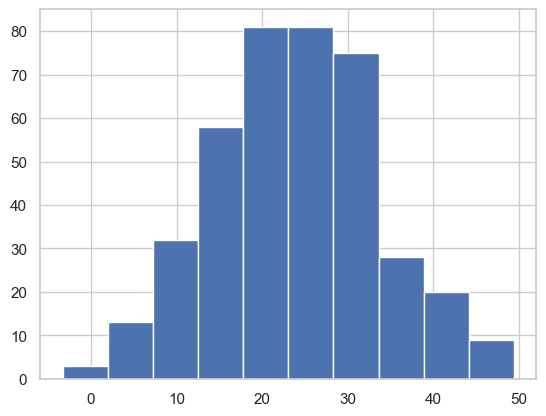

In [14]:
meta['BMI'].hist()

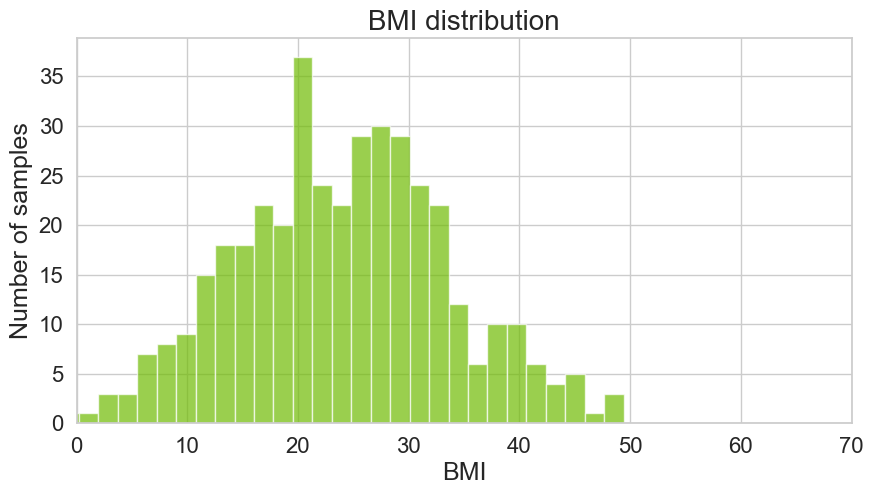

In [15]:
# you can modify the code to make plot more informative
plt.figure(figsize=(10,5))
sns.set(style="whitegrid")

plt.hist(meta['BMI'], bins=30, color='#70bb03', alpha=0.7)
plt.xlabel('BMI', fontsize=18)
plt.ylabel('Number of samples', fontsize=18)
plt.title('BMI distribution', fontsize=20)
plt.xlim(0,70)
# label size
plt.tick_params(labelsize=16)

#plt.savefig('results/Fig1c_ReadsNumb.svg', bbox_inches='tight')
#plt.savefig('results/Fig1c_ReadsNumb.png', bbox_inches='tight')

<b>Завдання:</b> 
- Що ви можете сказати про розподіл даних?
- Побудуйте гістограмми для інших параметрів (вік, BMI)

### Чи можна удосконалити візуалізауію та наприклад показати зразу два парметри на одному графіку?
Стандартна візуалізація структури популяціі відображає age and gender distribution 

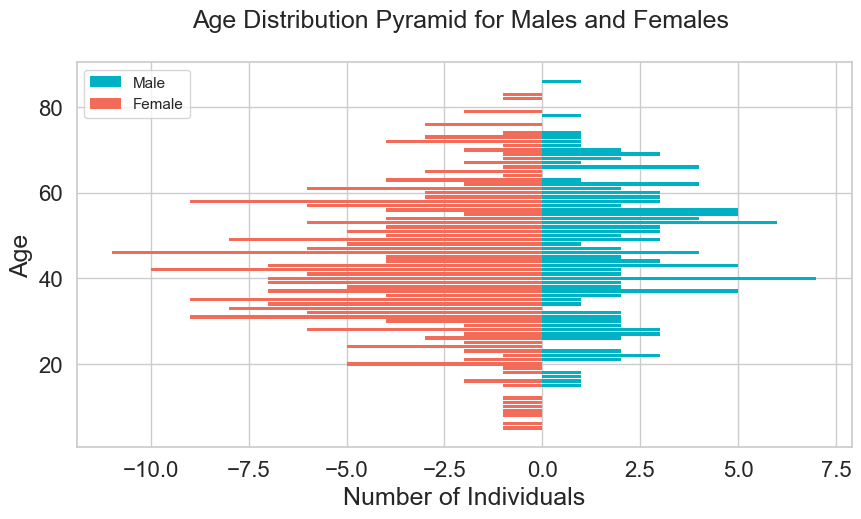

In [16]:
sns.set(style="whitegrid")
# Group the data by 'gender' and 'age' and count the number of cases for each age
age_counts = meta.groupby(['Gender', 'Age']).size().unstack()
age_counts = age_counts.reset_index(drop=True).T.reset_index()

# Create a pyramid chart
fig, ax = plt.subplots(figsize=(10, 5))

# Plot the pyramid chart for males and females
ax.barh(age_counts.Age, age_counts[0], label='Male', color='#00b1c4', linewidth=0.01)
ax.barh(age_counts.Age, -age_counts[1], label='Female', color='#f26b58', linewidth=0.01)
ax.set_xlabel('Number of Individuals', fontsize=18)
ax.set_ylabel('Age', fontsize=18)
ax.set_title('Age Distribution Pyramid for Males and Females \n', fontsize=18)
ax.legend()
plt.tick_params(labelsize=16)
#plt.savefig('results/Fig1b_Pyramid.svg', bbox_inches='tight')
#plt.savefig('results/Fig1b_Pyramid.png', bbox_inches='tight')

plt.show()

<details>
  <summary> Різні види популяцій </summary>
  
  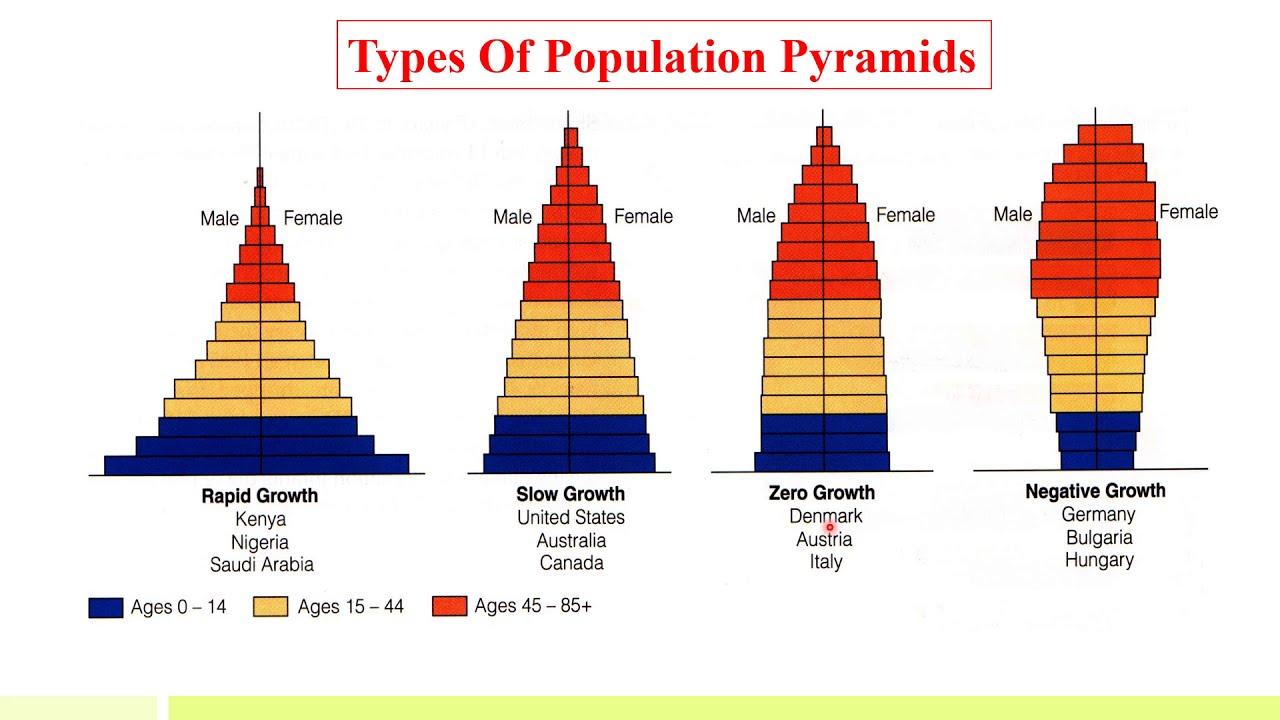

</details>

<details>
  <summary> Популяційна структура в Україні </summary>
  
  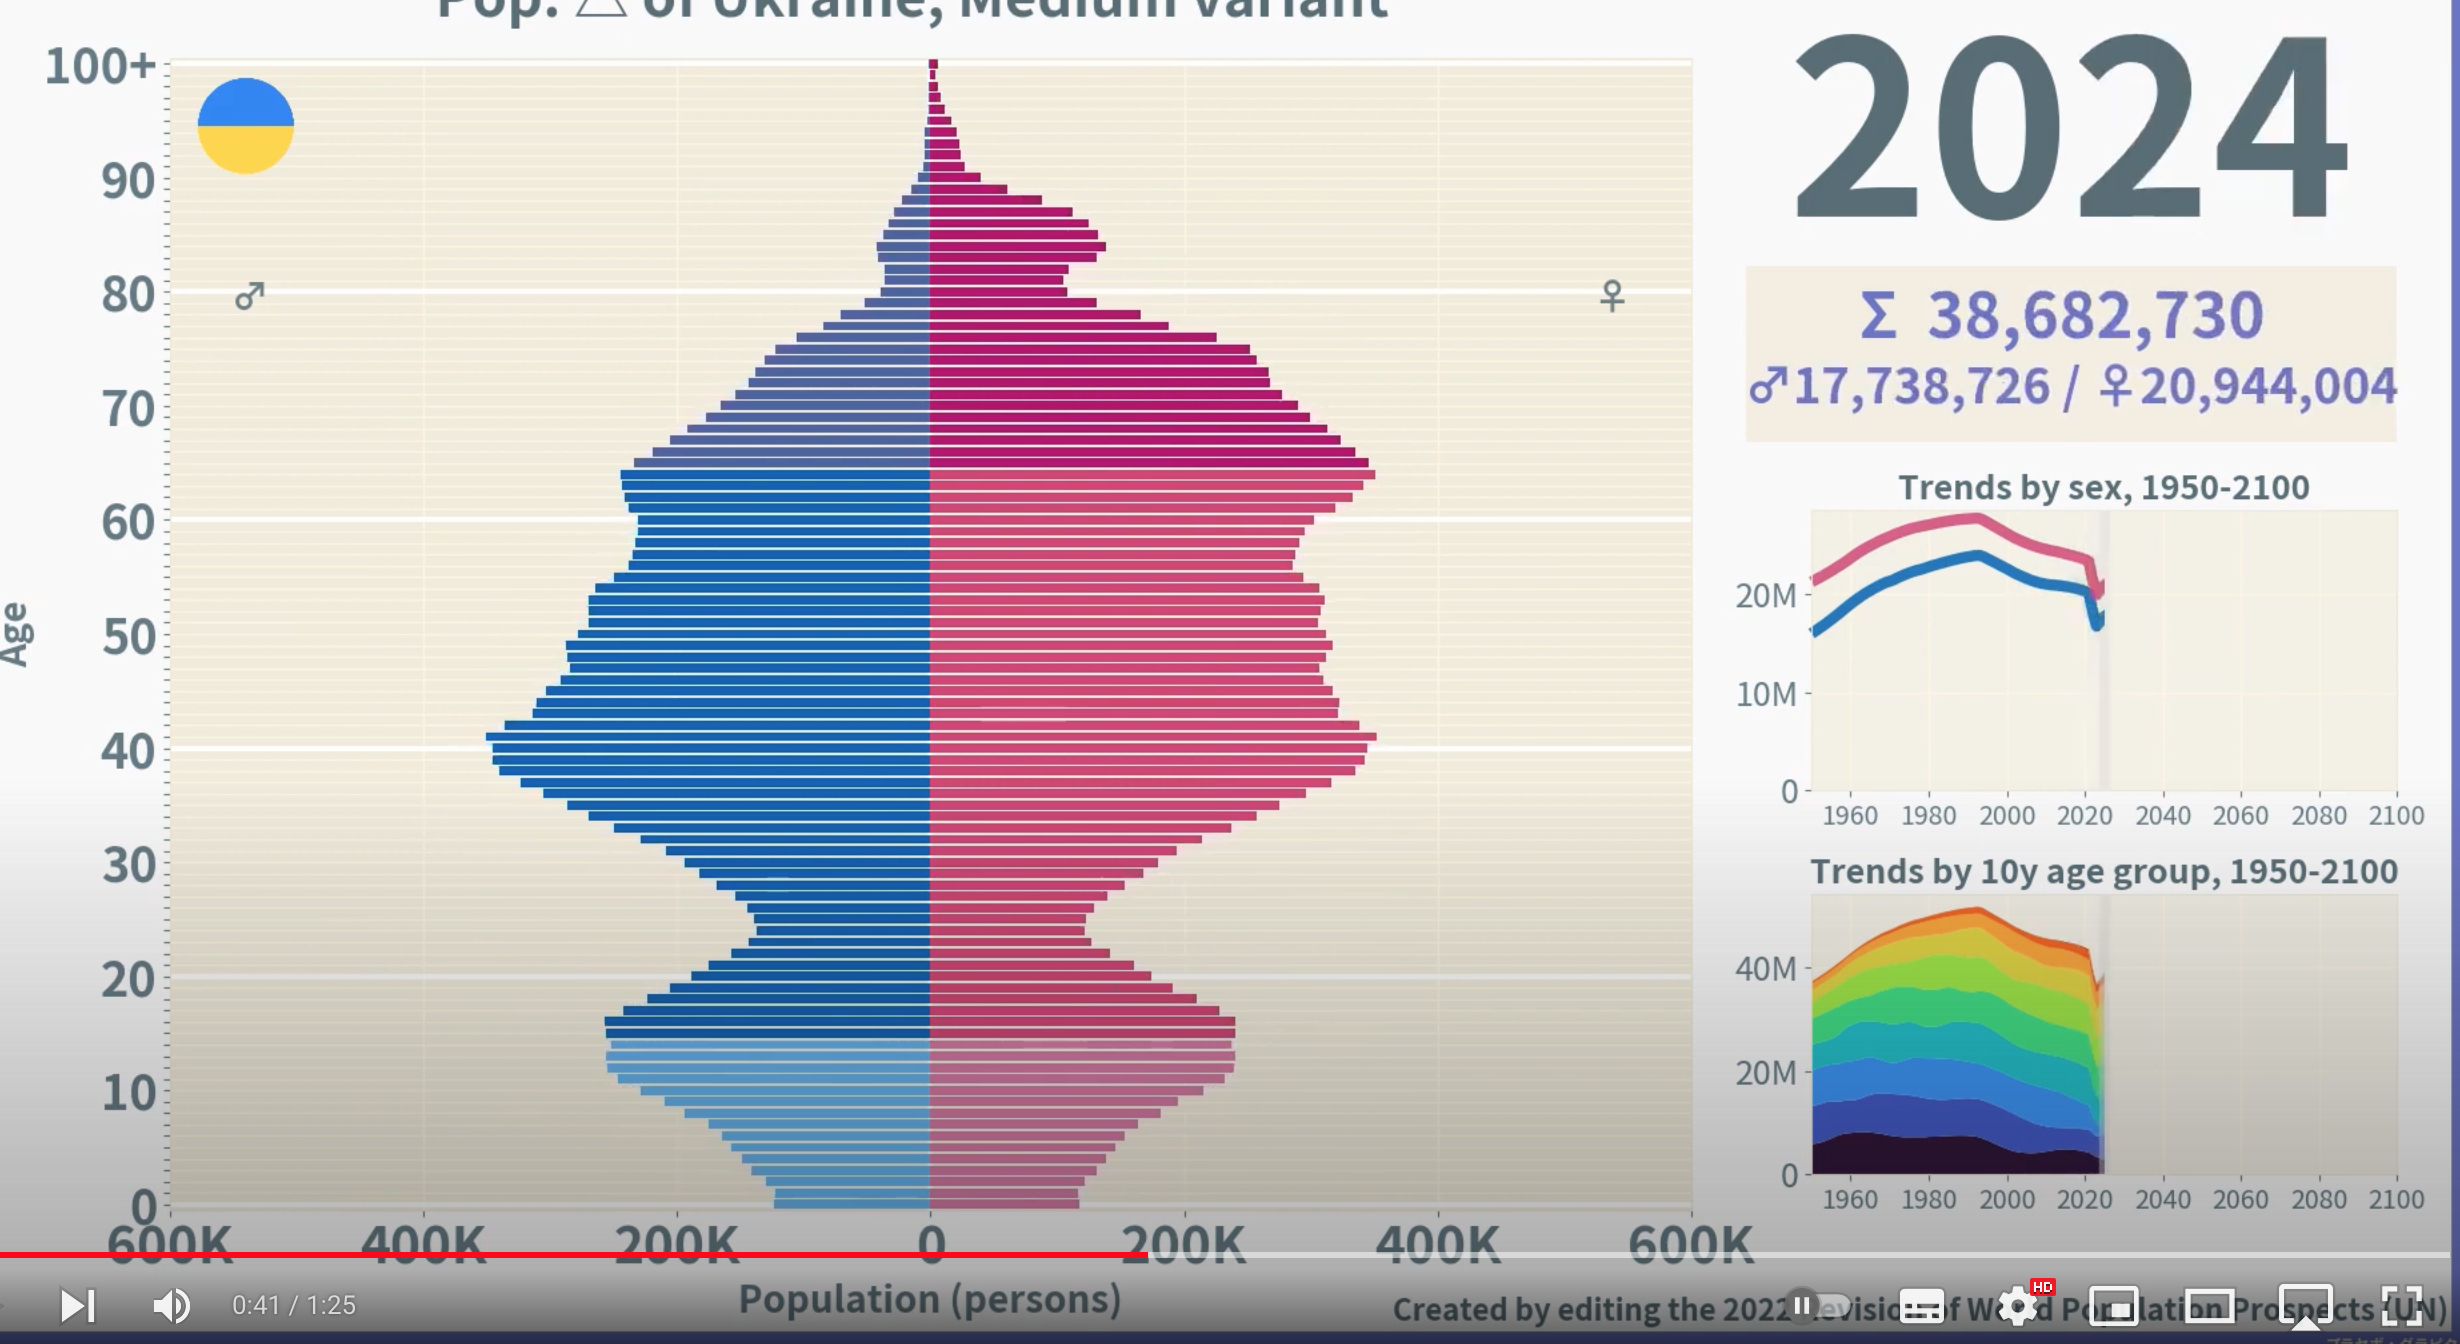

</details>

# Swarmplot & Violinplot

([<matplotlib.axis.XTick at 0x7fae472609d0>,
 [Text(0, 0, 'Female'), Text(1, 0, 'Male')])

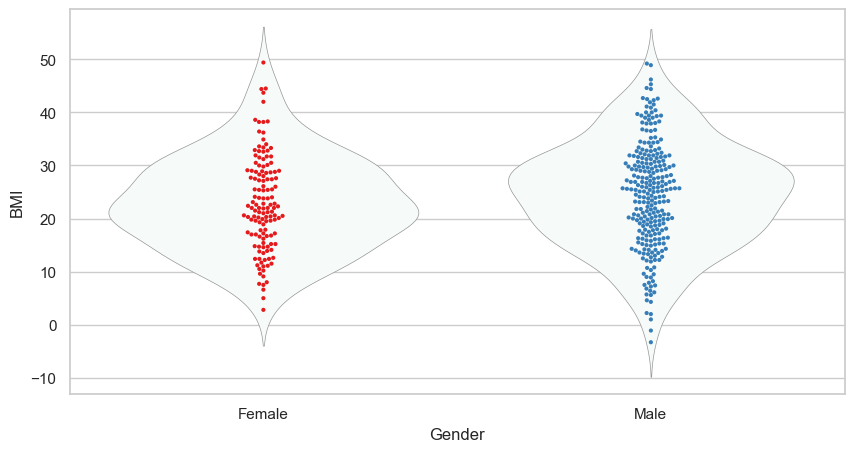

In [17]:
plt.figure(figsize=(10, 5))
sns.set(style="whitegrid")

ax = sns.swarmplot(x="Gender", y="BMI", data=meta, size=3, hue='Gender', palette='Set1', legend=False)
ax = sns.violinplot(x="Gender", y="BMI", data=meta, color='#f5fcfa',linewidth=0.5, inner=None)
#plt.ylabel('')
plt.xticks([0, 1], ['Female', 'Male'])

#plt.savefig('results/Fig1f_completness_cm2.png', dpi=300, bbox_inches='tight')
#plt.savefig('results/Fig1f_completness_cm2.svg', bbox_inches='tight')

<b>Завдання:</b> 
- Що ви можете сказати про розподіл даних?
- Побудуйте гістограмми для інших параметрів (вік, BMI)

# Piechart

([<matplotlib.patches.Wedge at 0x7fae46dd5f40>,
 [Text(0.33991867422268784, 1.0461621742897658, ''),
  Text(-0.33991857627391525, -1.046162206115244, '')])

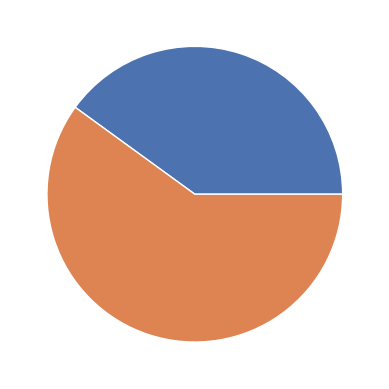

In [18]:
plt.pie([2,3])

In [19]:
meta['Gender'].value_counts()

1    265
0    135
Name: Gender, dtype: int64

([<matplotlib.patches.Wedge at 0x7fae46696700>,
 [Text(-0.5624223238769329, -0.9453470947778231, 'Female'),
  Text(0.5624222353671479, 0.9453471474355972, 'Male')],
 [Text(-0.3067758130237816, -0.5156438698788125, '66.3%'),
  Text(0.30677576474571694, 0.5156438986012348, '33.8%')])

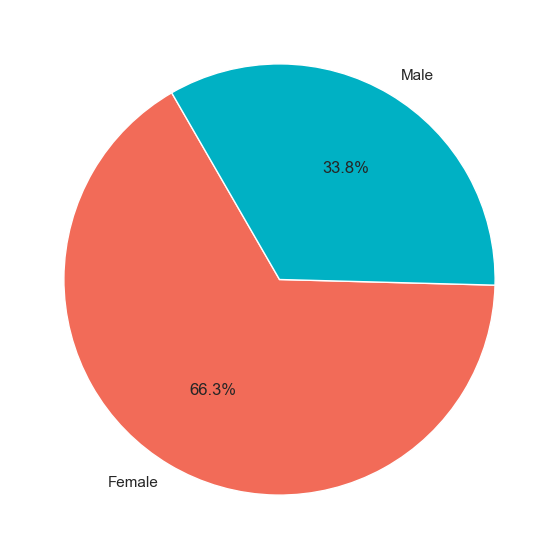

In [21]:
mq = meta['Gender'].value_counts()
mq = mq.reset_index()

mq = mq.sort_values(by='Gender', ascending=False)

plt.figure(figsize=(10, 7))
sns.set(style="whitegrid")

# draw a pie plot
plt.pie(mq['Gender'], labels=['Female','Male'], autopct='%1.1f%%', startangle=120, colors=['#f26b58', '#00b1c4'])

#plt.savefig('results/Fig1e_mq.png', dpi=300, bbox_inches='tight')
#plt.savefig('results/Fig1e_mq.svg', bbox_inches='tight')

<b>Коментар:</b> Зазвичай жінок більше у популяціонних когортах.

<b>Завдання:</b> 
- Що ви можете сказати про розподіл даних?
- Побудуйте piechart для статусу захворювання (вік, BMI)

# Heatmap

/var/folders/fr/j_4kmkcj6zs6nglntg64jfgr0000gn/T/ipykernel_55855/2700605448.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = meta.corr()


<Figure size 1000x1000 with 0 Axes>

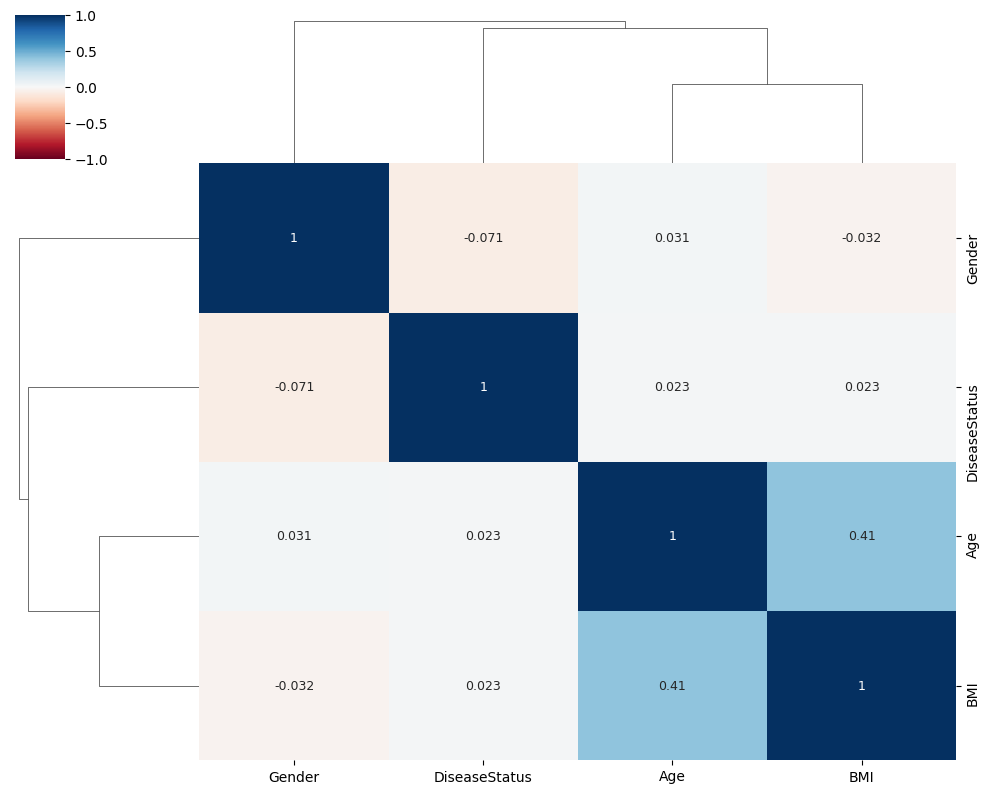

In [17]:
cor = meta.corr()
plt.figure(figsize=(10, 10))
sns.clustermap(cor, method="complete", cmap='RdBu', annot=True,
               annot_kws={"size": 9}, vmin=-1, vmax=1, figsize=(10,8))

<b>Завдання:</b> 
- Зробіть висновки

# Scatterplot

Text(0.5, 1.0, 'Correlation between Age and BMI \n')

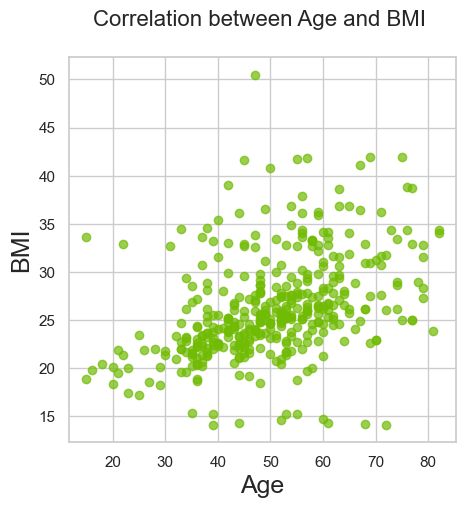

In [21]:
# plot correlation between Age and BMI
plt.figure(figsize=(5, 5))
sns.set(style="whitegrid")

plt.scatter(meta['Age'], meta['BMI'], color='#70bb03', alpha=0.7)
plt.xlabel('Age', fontsize=18)
plt.ylabel('BMI', fontsize=18)
plt.title('Correlation between Age and BMI \n', fontsize=16)

#plt.savefig('results/Fig1d_AgeBMI.png', dpi=300, bbox_inches='tight')